Step 1: Data Collection
Objective: Load the dataset into a Pandas DataFrame.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('indian-auto-mpg.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Unnamed: 0                              Name Manufacturer    Location  \
0           0            Maruti Wagon R LXI CNG       Maruti      Mumbai   
1           1  Hyundai Creta 1.6 CRDi SX Option      Hyundai        Pune   
2           2                      Honda Jazz V        Honda     Chennai   
3           3                 Maruti Ertiga VDI       Maruti     Chennai   
4           4   Audi A4 New 2.0 TDI Multitronic         Audi  Coimbatore   

   Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Engine CC  \
0  2010              72000       CNG       Manual      First        998   
1  2015              41000    Diesel       Manual      First       1582   
2  2011              46000    Petrol       Manual      First       1199   
3  2012              87000    Diesel       Manual      First       1248   
4  2013              40670    Diesel    Automatic     Second       1968   

    Power  Seats  Mileage Km/L  Price  
0   58.16      5         26.60   1.75  
1  126.20   

Step 2: Data Preprocessing
Objective: Handle missing values and convert categorical features into numerical values.

Steps:
Handle Missing Values:

Check for missing values.
Decide on a strategy to handle them (e.g., drop rows, fill with mean/median/mode).
Feature Engineering:

Extract relevant features if needed.
Rename columns for consistency.
Convert Categorical Features:

Convert categorical features into numerical values using one-hot encoding.

In [5]:
# Handle missing values
df = df.dropna()  # For simplicity, we drop rows with missing values

# Feature engineering (rename columns for consistency)
df.rename(columns={
    'Engine CC': 'Engine_CC',
    'Mileage Km/L': 'Mileage_Km/L'
}, inplace=True)

# Convert categorical features into numerical values using one-hot encoding
categorical_features = ['Manufacturer', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
df = pd.get_dummies(df, columns=categorical_features)


# Summary statistics
print(df.describe())

# Display the first few rows of the processed dataset
print(df.head())


       Unnamed: 0         Year  Kilometers_Driven    Engine_CC        Power  \
count  5975.00000  5975.000000       5.975000e+03  5975.000000  5975.000000   
mean   3008.80887  2013.386778       5.867431e+04  1621.606695   112.599819   
std    1739.30056     3.247238       9.155851e+04   601.036987    53.659495   
min       0.00000  1998.000000       1.710000e+02   624.000000    34.200000   
25%    1502.50000  2012.000000       3.390800e+04  1198.000000    74.000000   
50%    3010.00000  2014.000000       5.300000e+04  1493.000000    92.700000   
75%    4514.50000  2016.000000       7.300000e+04  1984.000000   138.100000   
max    6018.00000  2019.000000       6.500000e+06  5998.000000   560.000000   

             Seats  Mileage_Km/L        Price  Manufacturer_Ambassador  \
count  5975.000000   5975.000000  5975.000000              5975.000000   
mean      5.278828     18.179408     9.501647                 0.000167   
std       0.808959      4.521801    11.205736                 0.01

Step 3: Exploratory Data Analysis (EDA)
Objective: Visualize the data to understand the distribution of features and the target variable (Price), and to identify any patterns or correlations.

Steps:
Summary Statistics:

Calculate and display summary statistics for numerical features.
Correlation Matrix:

Calculate and display the correlation matrix to identify relationships between features.
Visualization:

Create various plots to visualize the data, including histograms, box plots, scatter plots, pair plots, bar plots, and heatmaps.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

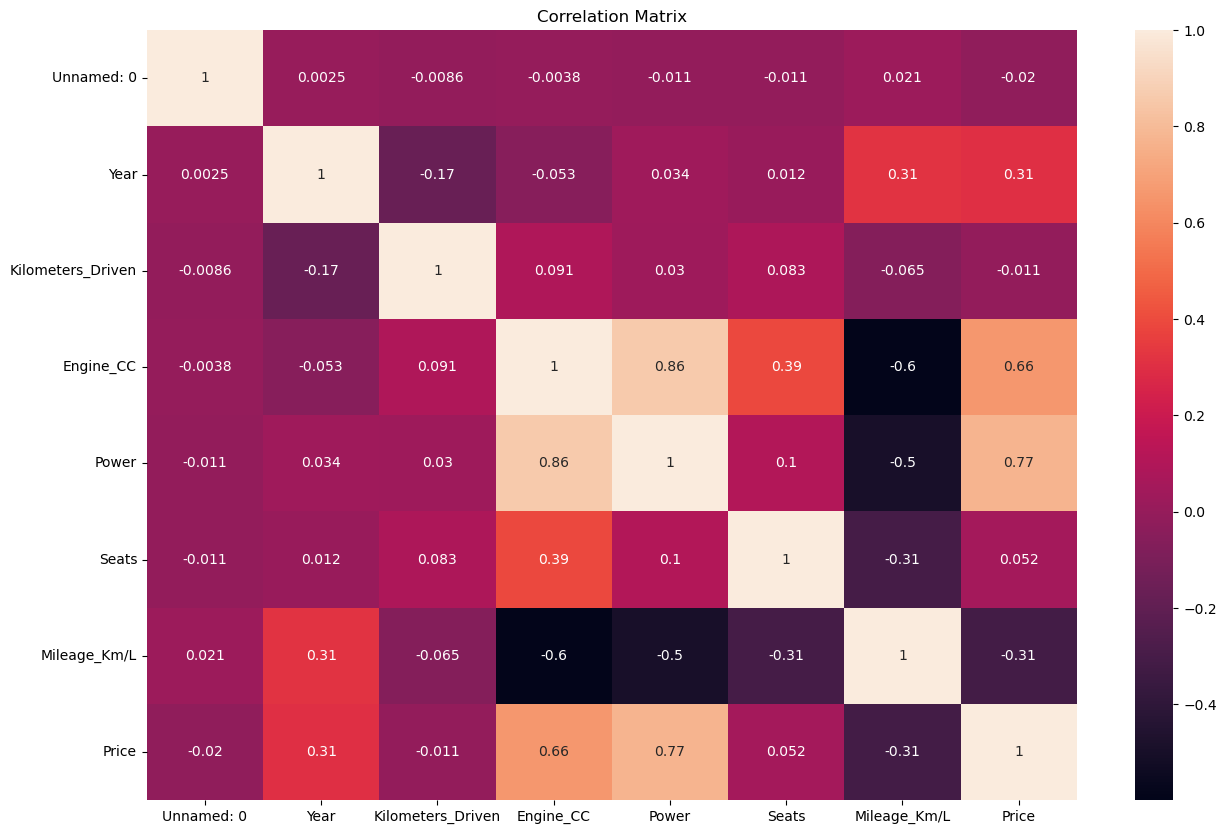

In [7]:
# Correlation matrix - Only for numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric features
corr_matrix = numeric_features.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

# Visualizations

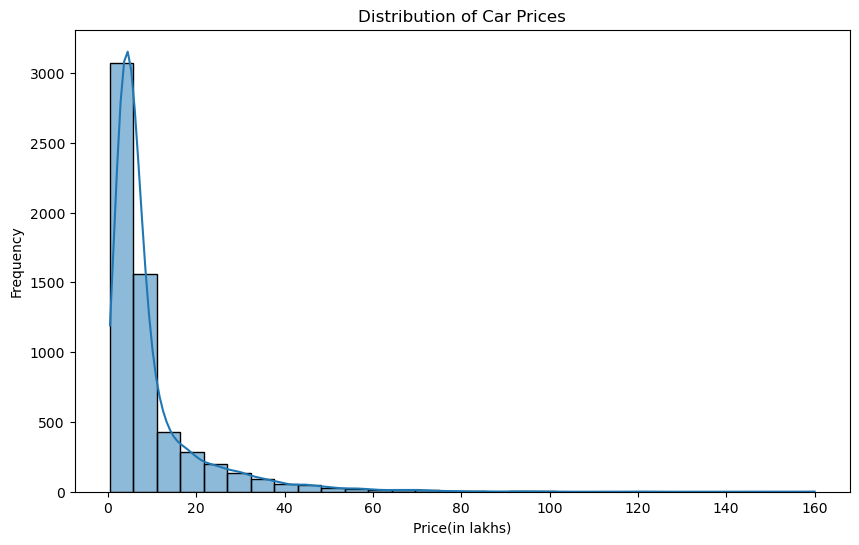

In [8]:
# Histogram of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price(in lakhs)')
plt.ylabel('Frequency')
plt.show()

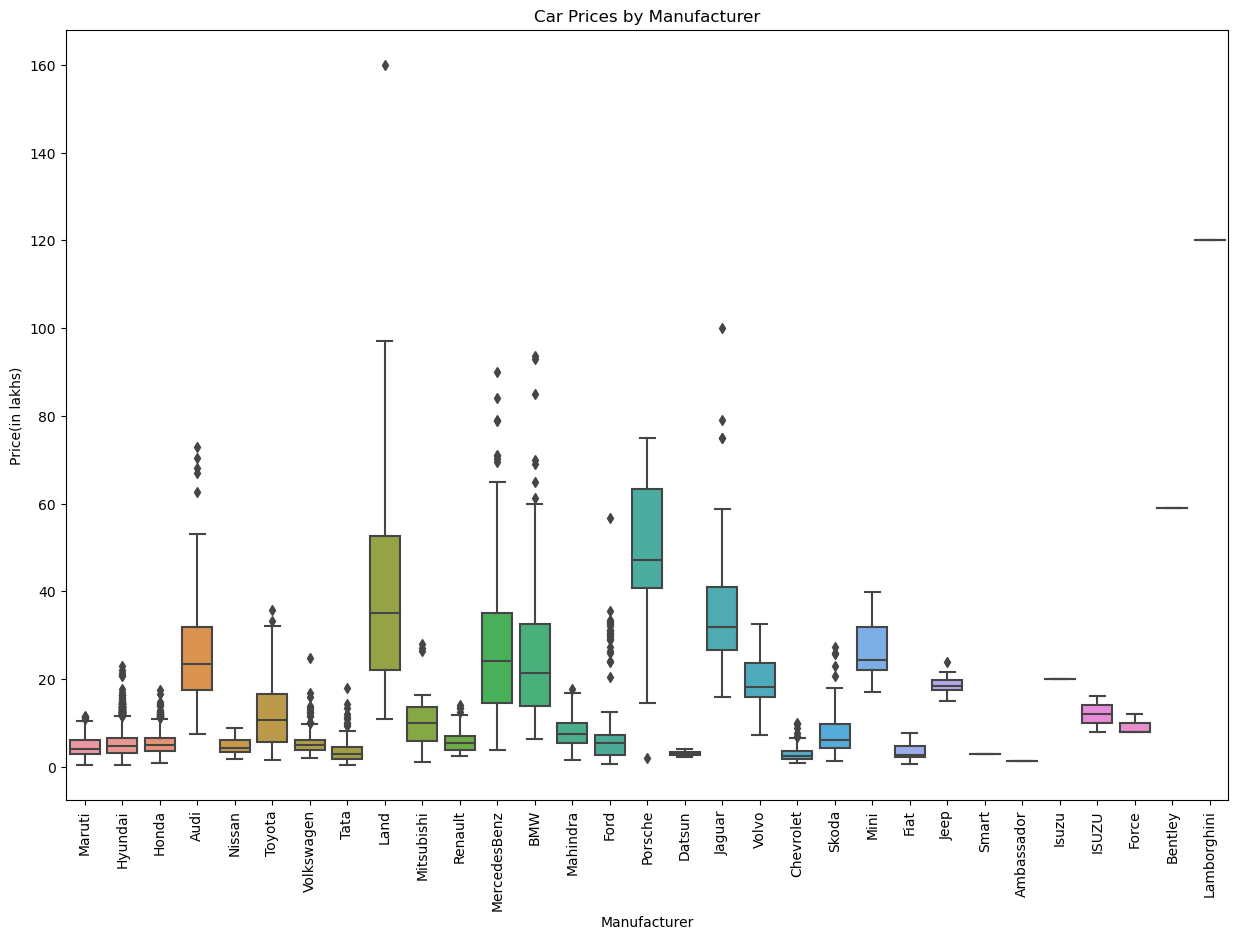

In [9]:
# Box Plot of Car Prices by Manufacturer
plt.figure(figsize=(15, 10))
sns.boxplot(x='Manufacturer', y='Price', data=pd.read_csv('indian-auto-mpg.csv'))
plt.xticks(rotation=90)
plt.title('Car Prices by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price(in lakhs)')
plt.show()

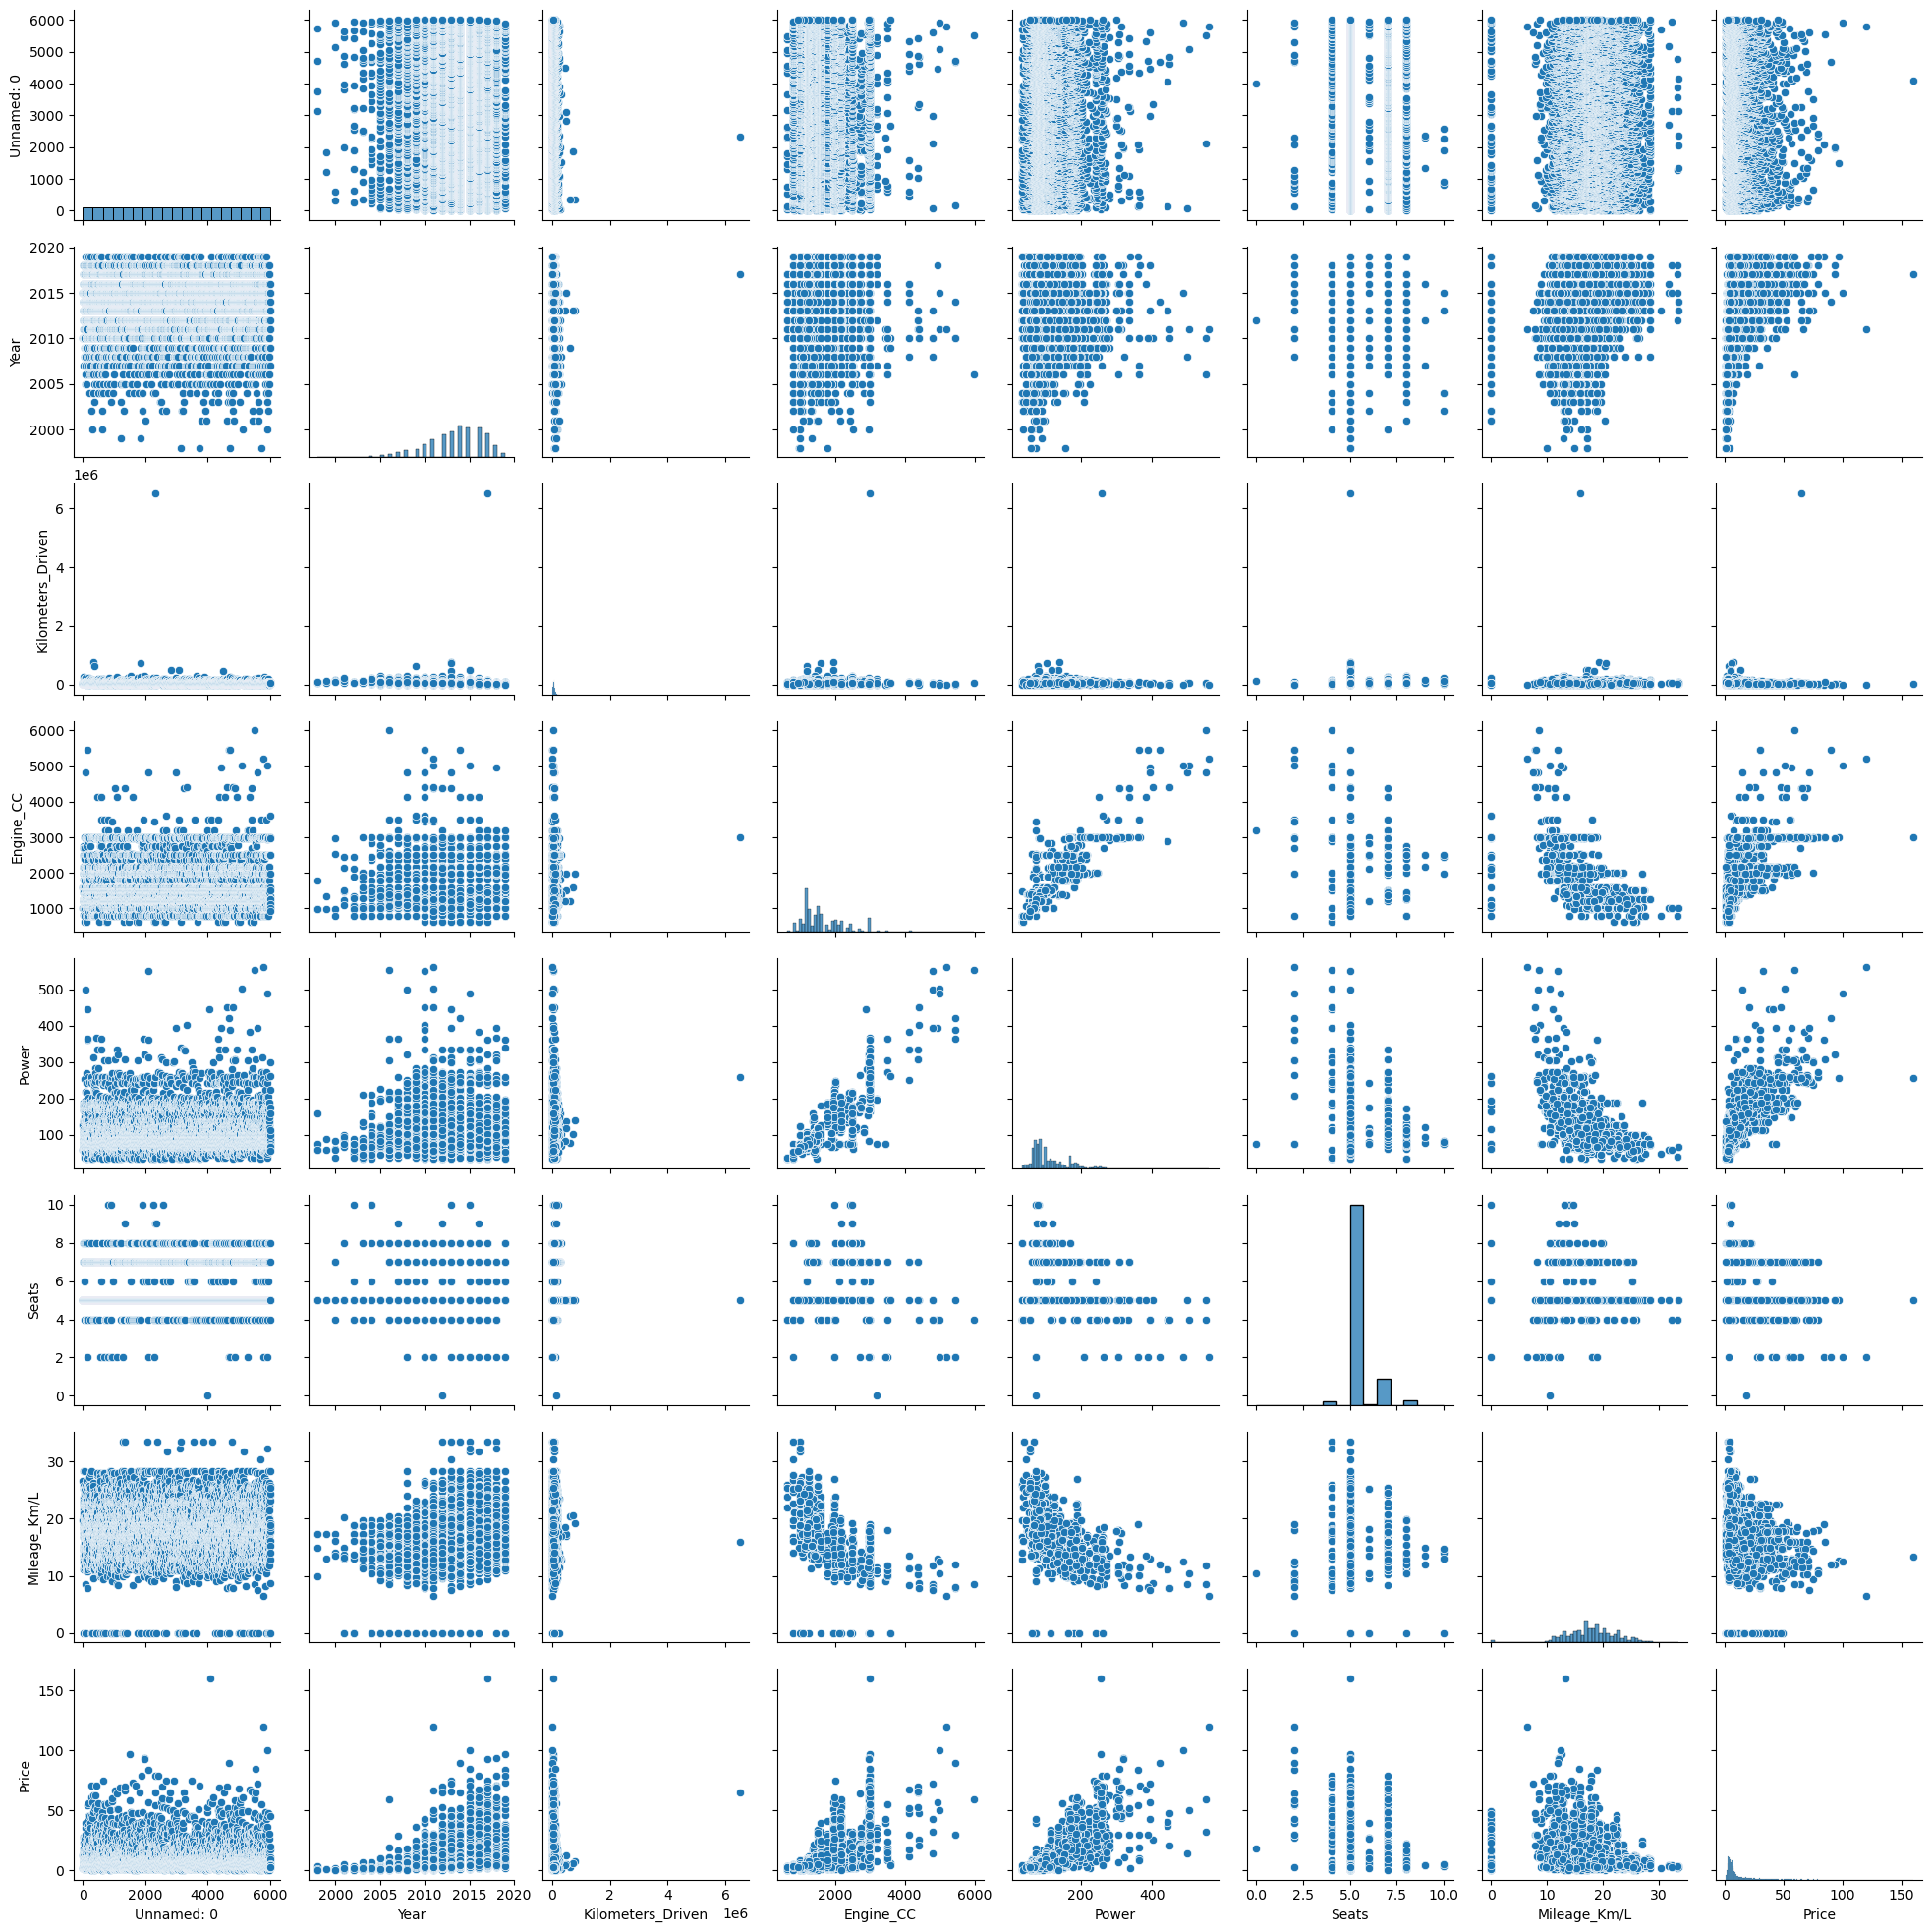

In [10]:
# Pair Plot
sns.pairplot(numeric_features)
plt.show()

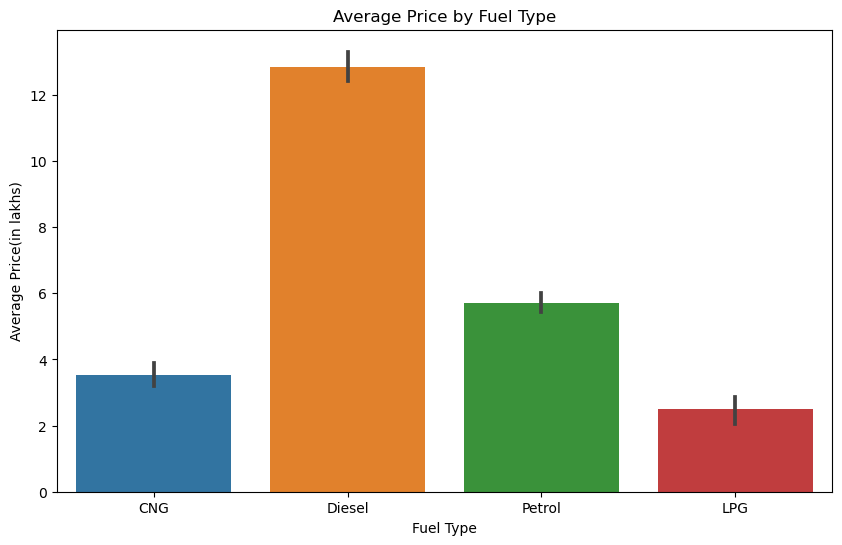

In [11]:
# Bar Plot of Average Price by Fuel Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Price', data=pd.read_csv('indian-auto-mpg.csv'))
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price(in lakhs)')
plt.show()

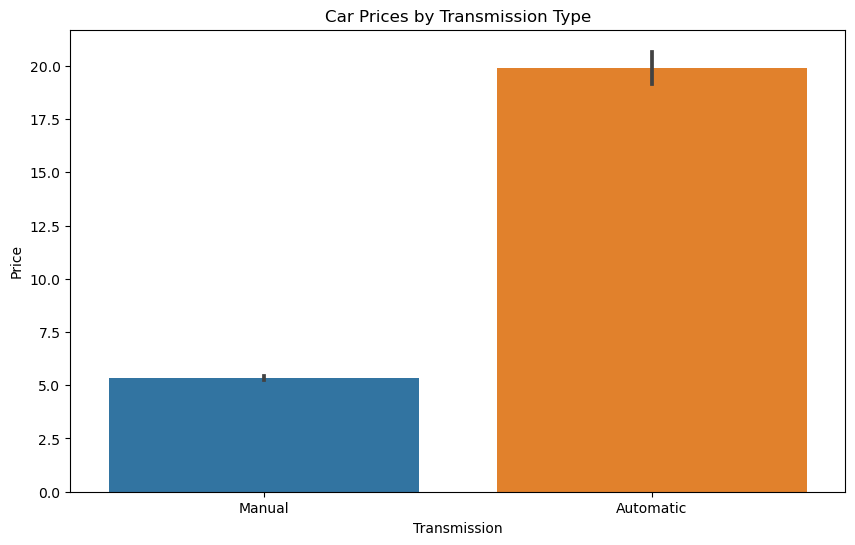

In [12]:
# Box Plot of Car Prices by Transmission Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Transmission', y='Price', data=pd.read_csv('indian-auto-mpg.csv'))
plt.title('Car Prices by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

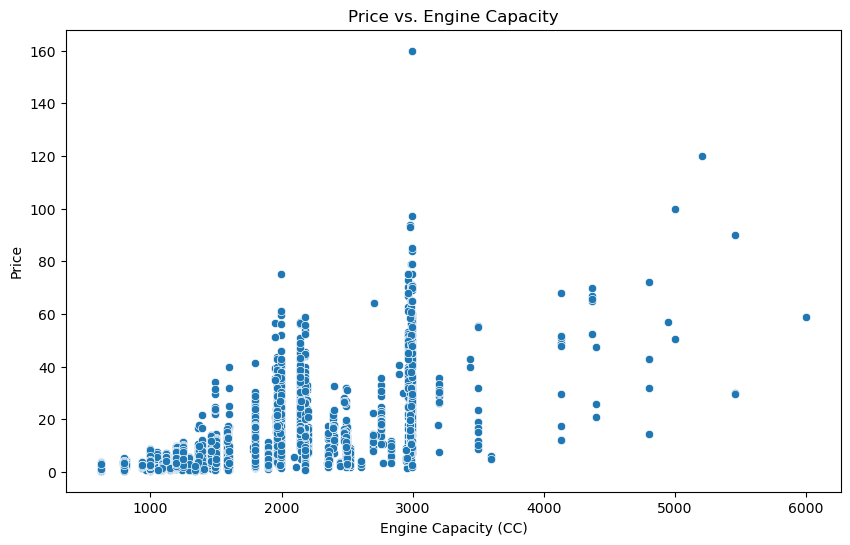

In [13]:
# Scatter Plot of Price vs. Engine Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine CC', y='Price', data=pd.read_csv('indian-auto-mpg.csv'))
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (CC)')
plt.ylabel('Price')
plt.show()

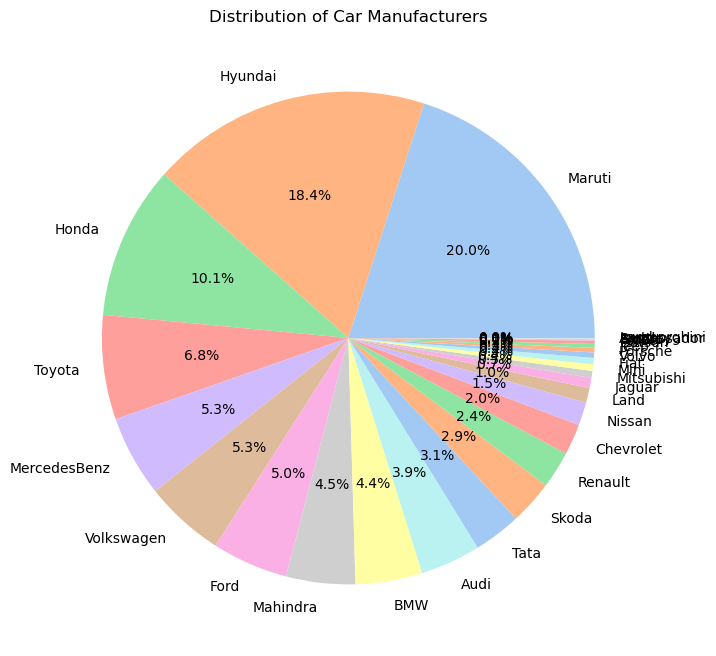

In [14]:
data = pd.read_csv('indian-auto-mpg.csv')
# Pie Chart of Car Manufacturers
plt.figure(figsize=(8, 8))
manufacturer_counts = data['Manufacturer'].value_counts()  # Count occurrences of each manufacturer
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Car Manufacturers')
plt.show()

The next step is Feature Engineering and Selection.

In [24]:
import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('indian-auto-mpg.csv')

# Preprocessing
data = data.drop(columns=['Unnamed: 0', 'Name'])

X = data.drop(columns=['Price'])
y = data['Price']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Kilometers_Driven', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L']),
        ('cat', OneHotEncoder(), ['Manufacturer', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
    ],
    remainder='passthrough'
)

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model and preprocessor
joblib.dump((model, preprocessor), 'car_price_model_preprocessor.pkl')


['car_price_model_preprocessor.pkl']

In [25]:
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 59.37508660012053
R^2 Score: 0.5921388276393778


In [17]:
# import pickle

# # Save the model
# with open('car_price_model.pkl', 'wb') as file:
#     pickle.dump(model, file)


In [26]:
# Make predictions using the test set
y_pred = model.predict(X_test)


In [19]:
import pandas as pd

# Create a DataFrame to compare actual vs. predicted values
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head())


      Actual  Predicted
5957   17.56  21.150504
4333    6.60   6.820721
2585   11.50  21.691119
1755   38.00  29.259744
4773    9.66  12.605857


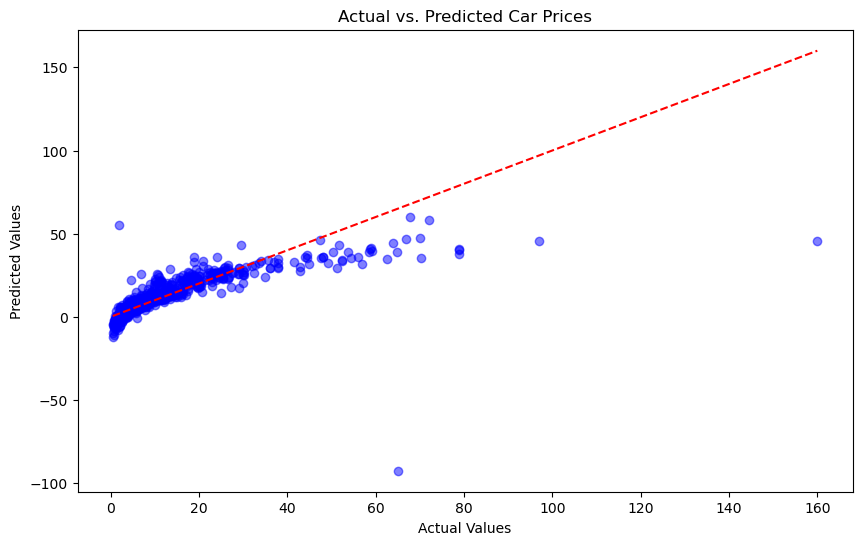

In [27]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Car Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


In [37]:
import pandas as pd
import joblib

# Load the model and preprocessor
model, preprocessor = joblib.load('car_price_model_preprocessor.pkl')

# Example new data
new_data = pd.DataFrame({
    'Manufacturer': ['Audi'],
    'Location': ['Coimbatore'],
    'Year': [2012],
    'Kilometers_Driven': [40670],
    'Fuel_Type': ['Diesel'],
    'Transmission': ['Automatic'],
    'Owner_Type': ['Second'],
    'Engine_CC': [1968],
    'Power': [140.8],
    'Seats': [5],
    'Mileage_Km/L': [15.2]
})

# Ensure column names are consistent
new_data.columns = ['Manufacturer', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 
                    'Transmission', 'Owner_Type', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L']

# Preprocess the new data
new_data_preprocessed = preprocessor.transform(new_data)

# Make predictions
new_predictions = model.predict(new_data_preprocessed)

print(f'Predicted Price: {new_predictions[0]} Lakhs')


Predicted Price: 20.322874390069657 Lakhs
